In [15]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Importing the WISCONSIN Breast Cancer Dataset
data = pd.read_csv('data.csv')

In [17]:
# First 5 entries of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# Features provided in the data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [19]:
# Check if any missing or NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Now we can see Unnamed:32 have 0 non null object it means the all values are null in this column so we cannot use this column for our analysis*

###### Clean and Normalization Data
As you can see there are useless columns, like "id" and "Unnamed: 32". Let's drop them. Also We need to change categorical data to numeric data.

In [20]:
data.drop("id", axis=1, inplace=True)
data.drop("Unnamed: 32",axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

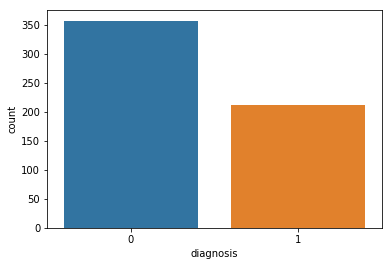

In [21]:
# Division of data into Beningn and Malignant(0 and 1)
sns.countplot(data['diagnosis'],label="Count")

### Principle Component Analysis 

The purpose for doing principal component analysis on the labeled data here is to observe the variance explained by each of the components and the associated weights assigned to each feature. The resulting output will aid in deciding on which features to drop.

In [22]:
from sklearn.decomposition import PCA

In [23]:
# useful_data
useful_data = data.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(useful_data)

# Dimmension indexing
dimmensions  = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4),columns=useful_data.keys())
components.index = dimmensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variancce_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variancce_rations.index = dimmensions

print(pd.concat([variancce_rations, components], axis=1))

             Explained Variance  radius_mean  texture_mean  perimeter_mean  \
Dimension 1              0.9820       0.0051        0.0022          0.0351   
Dimension 2              0.0162       0.0093       -0.0029          0.0627   
Dimension 3              0.0016      -0.0123       -0.0064         -0.0717   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1     0.5168           0.0000            0.0000          0.0001   
Dimension 2     0.8518          -0.0000           -0.0000          0.0001   
Dimension 3    -0.0279           0.0001            0.0001          0.0003   

             concave points_mean  symmetry_mean           ...             \
Dimension 1                  0.0         0.0000           ...              
Dimension 2                  0.0        -0.0000           ...              
Dimension 3                  0.0         0.0001           ...              

             radius_worst  texture_worst  perimeter_worst  area_worst  \


### Observations
It can be observed that 98.20% of the variance is explained in dimmension 1. This means that nearly all of the variance in the data can be described by one dimmension. The remaining two describe a much smaller amount of the variance

In dimmension 1, most of the feature weight is associated with the **area_mean** and **area_worst** dimmension. Due to this, in the next step, I will visualize how well each of the mean features as well as **area_worst** and **perimeter_worst** explain the resulting diagnosis.

While we will not be using PCA in the actual machine learning phase, this describes the data well and helps understand which features should be further investogated for their importance in the final prediction.

### Feature Selection

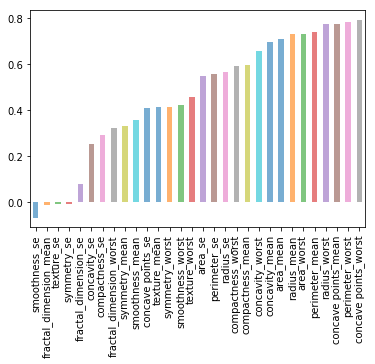

In [24]:
# Observe correlation to the diagnosis
tst = data.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [25]:
# Seperate out maligant and benign data for graphing
malignant = data[data['diagnosis'] == 1]
benign = data[data['diagnosis'] == 0]

In [26]:
# Column names to observe in following graphs - mean values only
observe = list(data.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = data.loc[:,observe]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


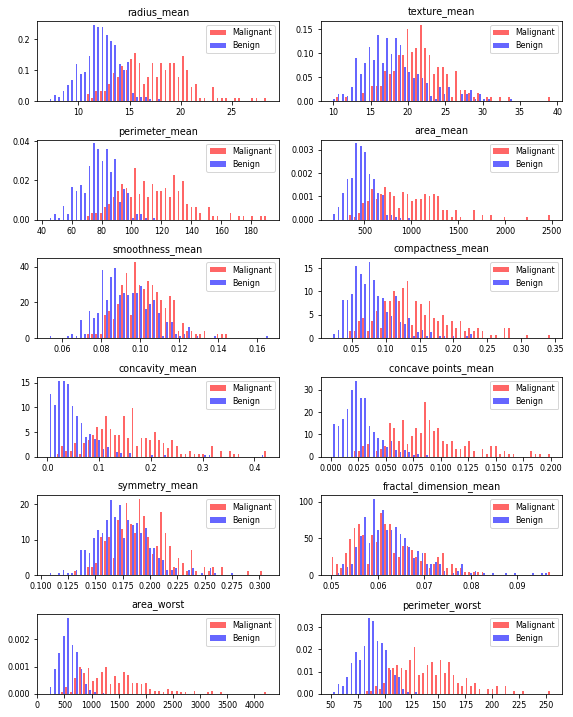

In [27]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(8,10))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(data[observe[idx]]) - min(data[observe[idx]]))/50
    bins = np.arange(min(data[observe[idx]]), max(data[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

### Observations
From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


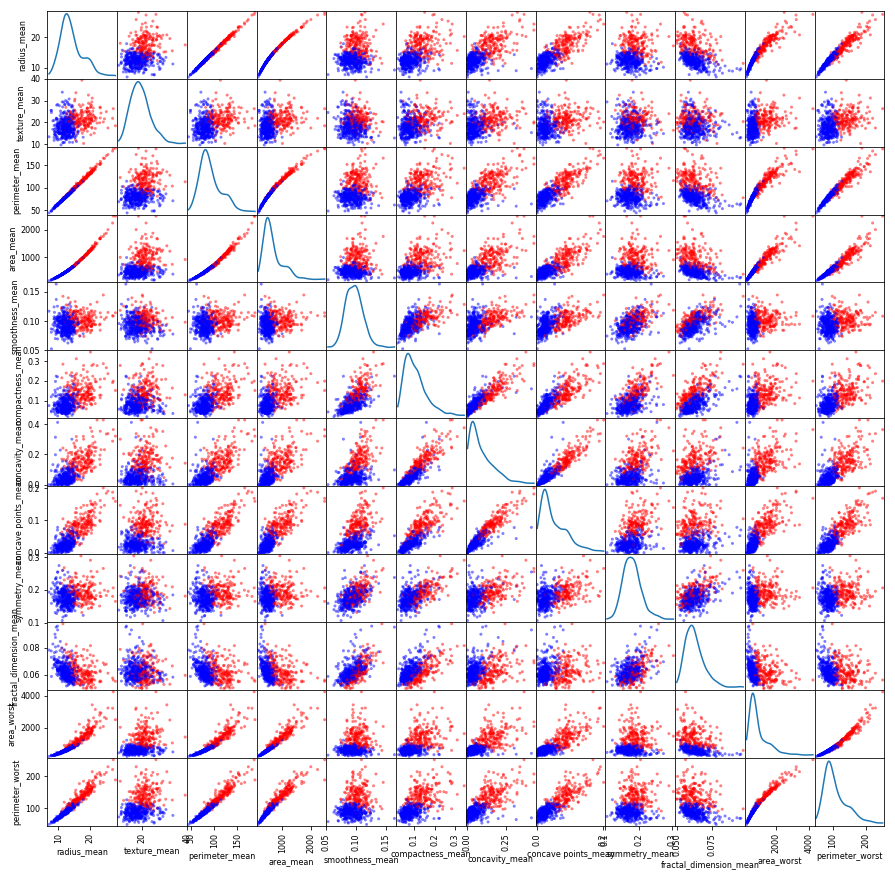

In [28]:
color_wheel = {0: "blue", 1: "red"}
colors = data["diagnosis"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

### Observations
The scatter matrix clarifies a few more points. The perimeter_mean, area_mean and radius mean have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features with the exception of fractal_dimension_mean, symmetry_mean and smoothness_mean.

Within these three features we can see quite a bit of mixing between malignant and benign cancer in the scatter matrix. This suggests that our assumption above, that they do not aid in predicting cancer type, is likely correct. There is less correlation and separability between the two diagnoses.

Due to the lack of clear separability and lack of variance explained I feel comfortable dropping them.

### Trimming Data
From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [29]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

### Classification
Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm's performance will be made.

In [30]:
# Split data appropriately
X = observables
y = data['diagnosis']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier()

Parameter tuning: optimizing the number of neighbors (k)

For optimization purposes it is suggested using the training data; and
for performance estimation or to figure out the best model, the test data will be used.

[0.846 0.799 0.872 0.825 0.872 0.839 0.879 0.859 0.866 0.859 0.872 0.852
 0.872 0.839 0.845 0.825 0.832 0.825 0.825 0.812 0.812 0.792 0.799 0.785
 0.792 0.785 0.785 0.785 0.799 0.792 0.792 0.792 0.792 0.792 0.792 0.785
 0.785 0.772 0.792 0.779 0.792 0.785 0.785 0.785 0.792 0.785 0.799 0.779
 0.792]


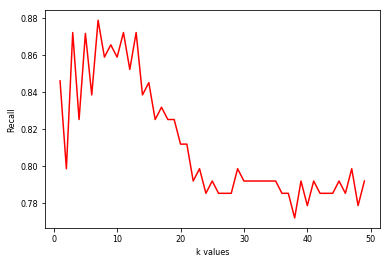

In [32]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

From the above plot the optimal k value is somewhere between 1 and 10. Looking at the scores, at k=5 we have the highest recall/sensitivity.
We can use a more efficient parameter tuning approach called GridSearchCV as shown below which basically automates the search process and it also fits the optimal parameter to the training data.

In [33]:
from sklearn.grid_search import GridSearchCV
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy


/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'n_neighbors': 11}
0.927
# Tuning hyper-parameters for recall
{'n_neighbors': 7}
0.879


Here, the optimal n_neighbors according to recall score (sensitivity) k=7 which is same for that of accuracy score. 

### SVM

In [34]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X,y)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 100, 'kernel': 'linear'}
0.963
# Tuning hyper-parameters for recall
{'C': 100, 'kernel': 'linear'}
0.934


Using accuracy and recall as scoring metrics, both give the same model as optimal i.e. {'C': 100, 'kernel': 'linear'}. Here below, we fit this model to the data and do visualization of the results.

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 10}
0.957
# Tuning hyper-parameters for recall
{'C': 1}
0.919


SVC and Logistic regression scored similar performance, but we should be careful since the model has not yet tested on test data or on data independent of the one used for training the models. Below, we fit the three models onto the test data (X_test) and compare the predictions (y_predict) with observations (y_test). For this purpose, various evaluation metrics are implemented.

### Model Selection

KNN:
 confusion matrix
 [[103   5]
 [  4  59]] 


Confusion matrix plot of KNN classifier


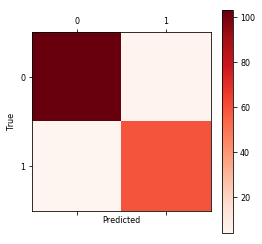


 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.95      0.96       108
          1       0.92      0.94      0.93        63

avg / total       0.95      0.95      0.95       171

#############################################################################
SVC:
 confusion matrix
 [[97 11]
 [ 6 57]] 


Confusion matrix plot of SVC


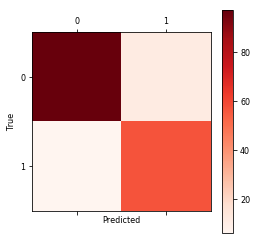


 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.90      0.92       108
          1       0.84      0.90      0.87        63

avg / total       0.90      0.90      0.90       171

#############################################################################
Logistic Regression:
confusion matrix
 [[104   4]
 [  2  61]] 


Confusion matrix plot of Logistic regression


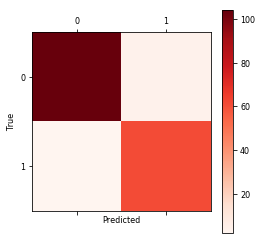


 Classification report 
              precision    recall  f1-score   support

          0       0.98      0.96      0.97       108
          1       0.94      0.97      0.95        63

avg / total       0.97      0.96      0.97       171



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# SVC
# fitting the SVC model on the training data and predicting for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# Logistic Regression
# fitting the lgr model on the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

MAke table here for all three methods with precision recall f1score

model: KNN
thresholds: [1.  0.8 0.6 0.4 0.2 0. ]
tpr:        [0.698 0.841 0.937 0.937 0.952 1.   ]
fpr:        [0.    0.028 0.046 0.083 0.176 1.   ]
model: SVC
thresholds: [1.    0.985 0.955 0.94  0.926 0.924 0.837 0.836 0.809 0.807 0.784 0.68
 0.641 0.371 0.359 0.128 0.124 0.078 0.078 0.074 0.073 0.022 0.022 0.02
 0.018 0.   ]
tpr:        [0.016 0.016 0.048 0.048 0.127 0.127 0.492 0.492 0.651 0.651 0.857 0.857
 0.905 0.905 0.921 0.921 0.937 0.937 0.952 0.952 0.968 0.968 0.984 0.984
 1.    1.   ]
fpr:        [0.    0.009 0.009 0.019 0.019 0.028 0.028 0.037 0.037 0.046 0.046 0.083
 0.083 0.139 0.139 0.287 0.287 0.565 0.565 0.611 0.611 0.852 0.852 0.88
 0.88  1.   ]
model: Logistic
thresholds: [1.    0.926 0.9   0.581 0.454 0.426 0.118 0.112 0.001]
tpr:        [0.016 0.841 0.841 0.968 0.968 0.984 0.984 1.    1.   ]
fpr:        [0.    0.    0.009 0.009 0.056 0.056 0.222 0.222 1.   ]


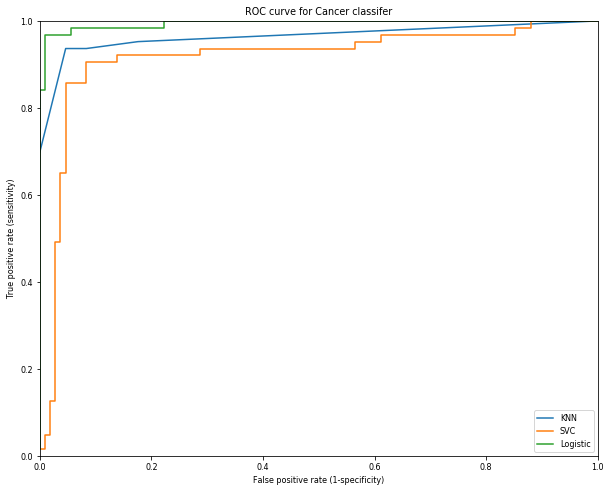

In [37]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)